# Menghubungkan dengan drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pathlib import Path
#memanggil data set lewat gdrive
Path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum7/data"

# Mengimport libraby

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset

In [4]:
# membaca file csv menggunakan pandas
df = pd.read_csv(Path + '/dataset_satelit.csv')

# cetak header data (5 baris data) dari file
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


# Melihat informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

#  Statistika deskriptif

In [6]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


# Menentukan target dan fitur

In [8]:
# Tentukan variabel target
target = 'N'
y = df[target]

# Tentukan variabel fitur (X)
# Kita ambil semua kolom sensor + lokasi
fitur = [
    'Longitude', 'Lattitude', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6',
    'b5', 'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia',
    'iafe', 'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'
]

# Kita juga perlu menghapus baris yg datanya kosong (NaN) jika ada
df_clean = df.dropna(subset=[target] + fitur)

y = df_clean[target]
X = df_clean[fitur]

print(f"\nVariabel Target (Y): {target}")
print(f"Jumlah Fitur (X): {len(fitur)} kolom")


Variabel Target (Y): N
Jumlah Fitur (X): 23 kolom


# Membagi data menjadi data training 80% dan data testing 20%

In [9]:
# Membagi dataset menjadi data training dan data testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Latih (Train): {X_train.shape[0]} baris")
print(f"Data Uji (Test): {X_test.shape[0]} baris")

Data Latih (Train): 475 baris
Data Uji (Test): 119 baris


# Membangun model regresi linear menggunakan data training

In [10]:
# Membuat objek model instan dari class linearRegression
model_sklearn = LinearRegression()

# Lakukan proses training
model_sklearn.fit(X_train, y_train)

LinearRegression()

In [11]:
# Membuat prediksi menggunakan data testing
y_pred_sklearn = model_sklearn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_sklearn)
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

print("\n--- Hasil Evaluasi Model (Scikit-Learn) ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score)   : {r2:.4f}")

# Penjelasan singkat R2
print(f"\nModel ini dapat menjelaskan {r2*100:.2f}% variasi dari data 'N'.")


--- Hasil Evaluasi Model (Scikit-Learn) ---
Mean Absolute Error (MAE): 0.2009
Mean Squared Error (MSE): 0.0674
R-squared (R2 Score)   : 0.5550

Model ini dapat menjelaskan 55.50% variasi dari data 'N'.


# Cetak persamaan regresi

In [12]:
slope = model_sklearn.coef_[0]
intercept = model_sklearn.intercept_
print(f"persamaan: y= {slope:.3f} * x + {intercept:.3f}")

persamaan: y= -0.027 * x + 6.230


# Membangun Model Regresi OLS (Statsmodels)

Hasil summary dari semua kolom

In [13]:
# Statsmodels butuh kita menambahkan konstanta (intercept) secara manual
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# 1. Inisiasi dan latih model OLS
model_ols = sm.OLS(y_train, X_train_ols).fit()

# 2. Tampilkan ringkasan (summary) model
print("\n--- Ringkasan Model (Statsmodels OLS) ---")
print(model_ols.summary())


--- Ringkasan Model (Statsmodels OLS) ---
                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     31.00
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           4.58e-78
Time:                        09:16:29   Log-Likelihood:                -8.0909
No. Observations:                 475   AIC:                             64.18
Df Residuals:                     451   BIC:                             164.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

# Evaluasi model

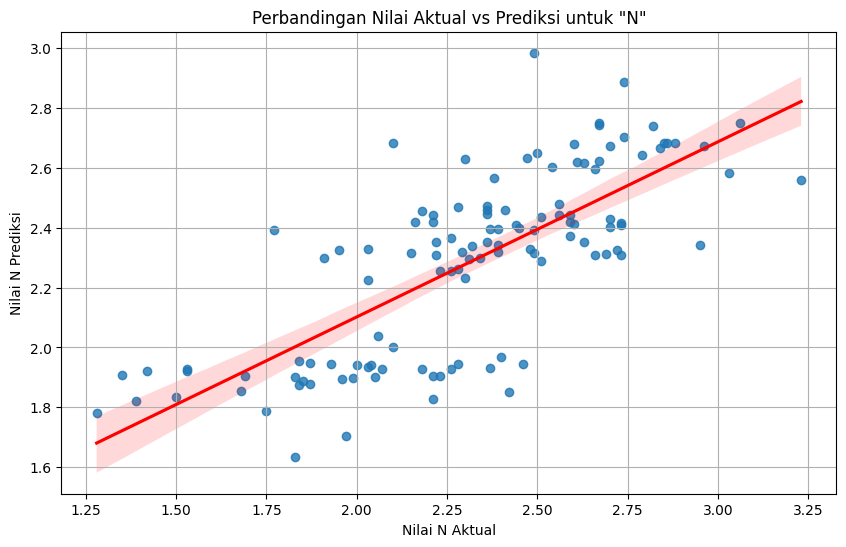


Visualisasi telah ditampilkan.


In [14]:
# Membuat DataFrame untuk perbandingan
df_hasil = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred_sklearn})

plt.figure(figsize=(10, 6))
sns.regplot(data=df_hasil, x='Aktual', y='Prediksi', line_kws={"color": "red"})
plt.title('Perbandingan Nilai Aktual vs Prediksi untuk "N"')
plt.xlabel('Nilai N Aktual')
plt.ylabel('Nilai N Prediksi')
plt.grid(True)
plt.show()

print("\nVisualisasi telah ditampilkan.")


--- Tabel Perbandingan Aktual vs Prediksi (10 Baris Pertama) ---
     Aktual  Prediksi
30     2.69  2.311107
299    2.28  1.944361
177    2.48  2.328077
204    2.66  2.308984
354    2.46  1.944220
265    1.99  1.896460
464    2.10  2.683706
551    2.66  2.595745
55     2.49  2.315840
196    2.31  2.293916


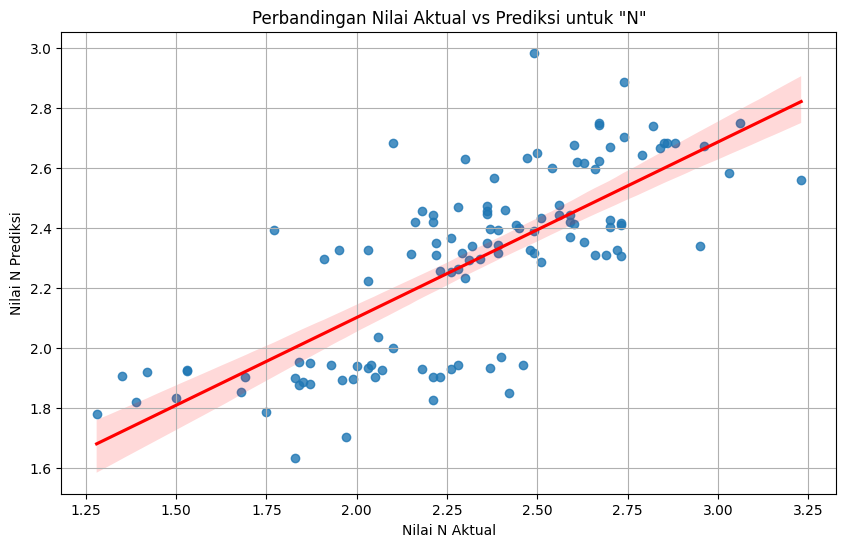


Visualisasi telah ditampilkan.


In [16]:
# Membuat DataFrame untuk perbandingan
df_hasil = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred_sklearn})

# --- TAMBAHAN: MENCETAK TABEL ---
print("\n--- Tabel Perbandingan Aktual vs Prediksi (10 Baris Pertama) ---")
print(df_hasil.head(10))
# -------------------------------

# Kode untuk visualisasi
plt.figure(figsize=(10, 6))
sns.regplot(data=df_hasil, x='Aktual', y='Prediksi', line_kws={"color": "red"})
plt.title('Perbandingan Nilai Aktual vs Prediksi untuk "N"')
plt.xlabel('Nilai N Aktual')
plt.ylabel('Nilai N Prediksi')
plt.grid(True)
plt.show()

print("\nVisualisasi telah ditampilkan.")

# Alasan pemilihan nitrogen sebagai target

Nitrogen dipilih sebagai target karena unsur ini memiliki pengaruh paling besar terhadap pertumbuhan tanaman. Kandungan Nitrogen berkaitan langsung dengan proses fotosintesis dan kondisi fisiologis tanaman, sehingga menjadi indikator penting dalam analisis vegetasi. Selain itu, banyak penelitian berbasis data satelit yang berfokus pada estimasi kadar Nitrogen melalui reflektansi berbagai kanal spektral. Nitrogen juga menunjukkan hubungan linear yang kuat dengan kanal inframerah dan Red Edge, sehingga sesuai digunakan sebagai target regresi. Sementara itu, variabel lain seperti b8, b9, NDVI, dan IAFE dijadikan fitur independen yang berperan dalam membantu model memprediksi nilai Nitrogen secara lebih akurat.

# Kesimpulan

Berdasarkan hasil pengujian, model Linear Regression mampu memprediksi nilai variabel “N” dari data satelit dengan akurasi yang cukup baik. Nilai Mean Absolute Error (MAE) sebesar 0.2009, Mean Squared Error (MSE) sebesar 0.0674, dan R-squared (R²) sebesar 0.5550 menunjukkan bahwa model dapat menjelaskan sekitar 55,50% variasi pada data target. Visualisasi perbandingan antara nilai aktual dan prediksi memperlihatkan pola yang cukup linier, menandakan kesesuaian antara hasil prediksi dan data sebenarnya. Meskipun demikian, performa model regresi linear masih bergantung pada kualitas data serta pemilihan fitur yang relevan. Secara keseluruhan, metode regresi linear ini efektif digunakan sebagai pendekatan awal dalam analisis dan prediksi nilai “N” berbasis data satelit.